
# Capstone Project 

# Author : Hamidreza Salahi

# Notebook : 2


## Contents:
* [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))


In [170]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
#Importing clean data
loan_sample = pd.read_csv('C:\\Users\\hamid\\Desktop\\Capstone\\Data\\loan_sample.csv')

loan_sample.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,application_type,loan_status,fico_avg
0,28000.0,28000.0,36,10.42,909.02,B,B3,Delivery Driver,5,MORTGAGE,...,0.0,8.0,0.0,11463.0,39.9,14.0,0.0,Individual,Fully Paid,737.0
1,15000.0,15000.0,36,10.08,484.58,B,B1,Utility worker,4,RENT,...,0.0,9.0,1.0,18061.0,27.2,27.0,1.0,Individual,Charged Off,672.0
2,8400.0,8400.0,36,14.98,291.11,C,C3,Office Manager,7,MORTGAGE,...,0.0,20.0,0.0,17197.0,64.2,28.0,0.0,Individual,Charged Off,662.0
3,3200.0,3200.0,36,13.99,109.36,C,C3,Teacher librarian,10,OWN,...,1.0,15.0,0.0,42988.0,78.2,45.0,0.0,Individual,Fully Paid,667.0
4,12000.0,12000.0,36,10.41,389.53,B,B3,Claims adjuster,10,RENT,...,2.0,1.0,0.0,9583.0,31.9,20.0,0.0,Individual,Fully Paid,687.0


Let's look at the distribution of all numeric columns. <br>
**The df.hist does not plot the categorical columns. We will investigate those columns later on**

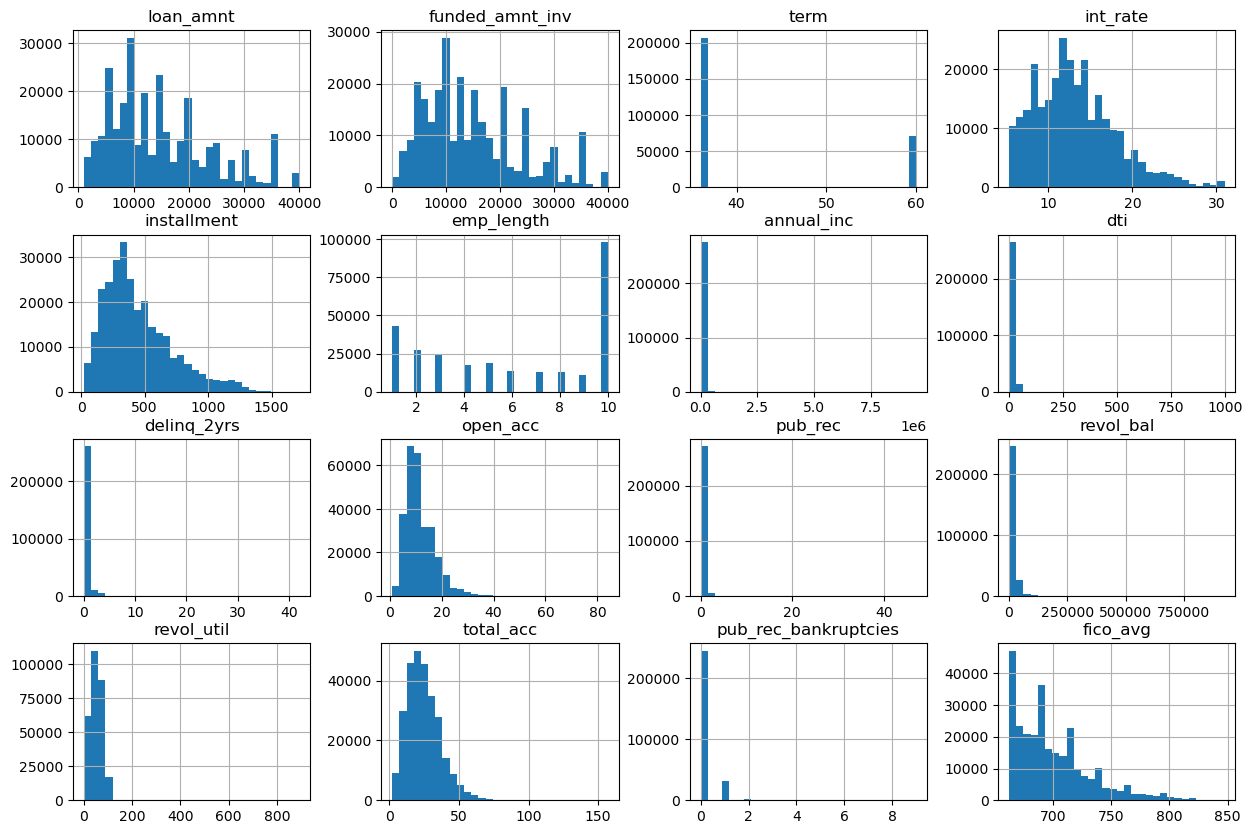

In [172]:
loan_sample.hist(bins=30, figsize=(15, 10))
plt.show()

I am going to redefine the upper limit of some columns which are extended way too high to right e.g. annual income, dti, delinq_2years_ open_acc_ pub_rec, revol_bal, revol_util

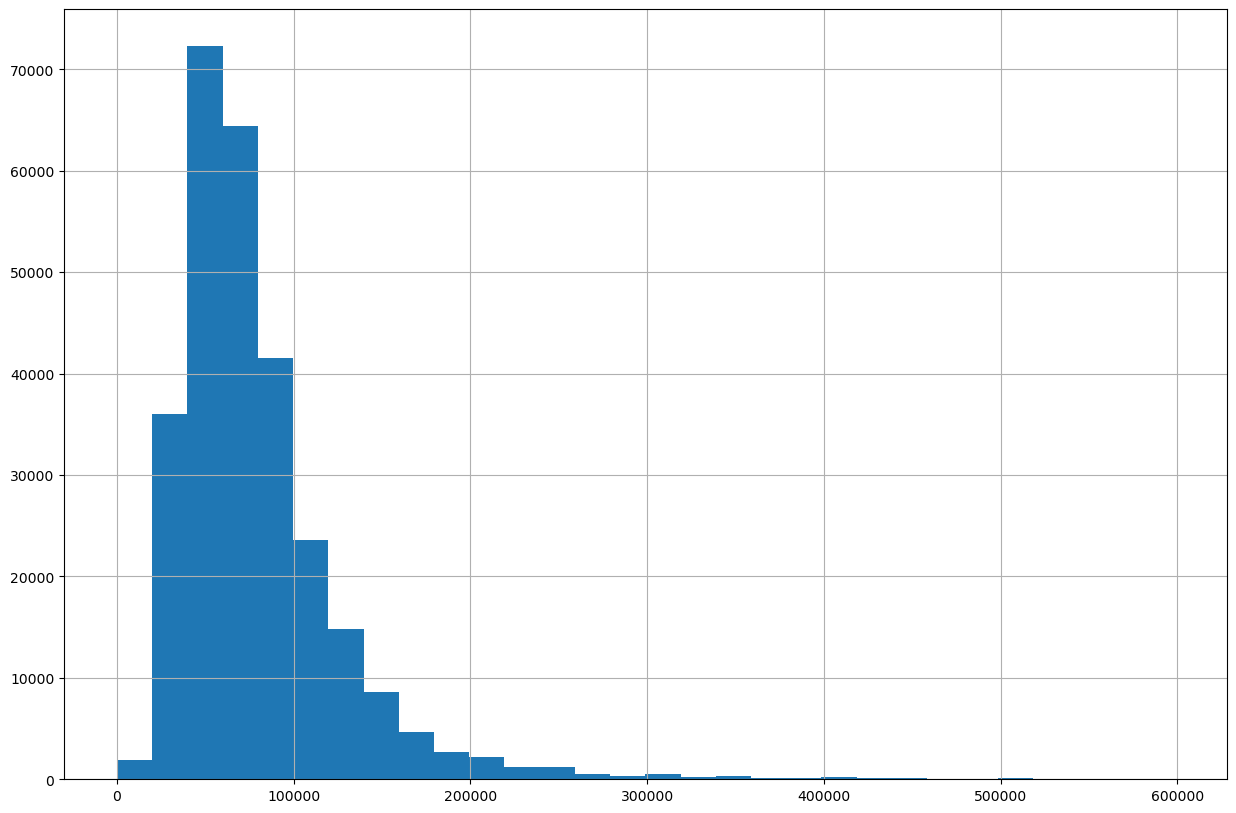

In [173]:
loan_sample[loan_sample['annual_inc']<600000]['annual_inc'].hist(bins=30, figsize=(15, 10))
plt.show()

In [174]:
# Upper limit of annual incoem is set at 600k 
loan_sample['annual_inc'].where(loan_sample['annual_inc']<600000 , 600000 , inplace=True)

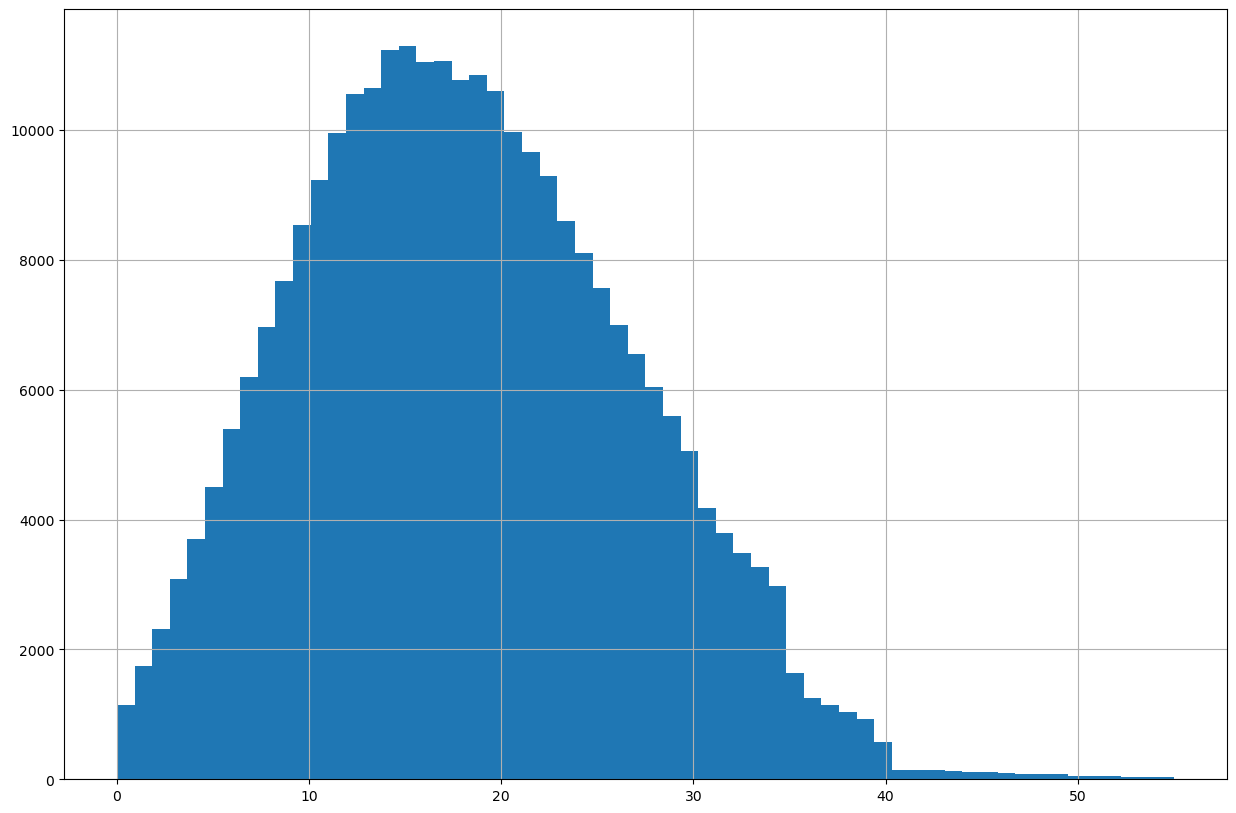

In [175]:
loan_sample[loan_sample['dti']<55]['dti'].hist(bins=60, figsize=(15, 10))
plt.show()

In [176]:
# Upper limit of is set at 55 
loan_sample['dti'].where(loan_sample['dti']<55 , 55 , inplace=True)

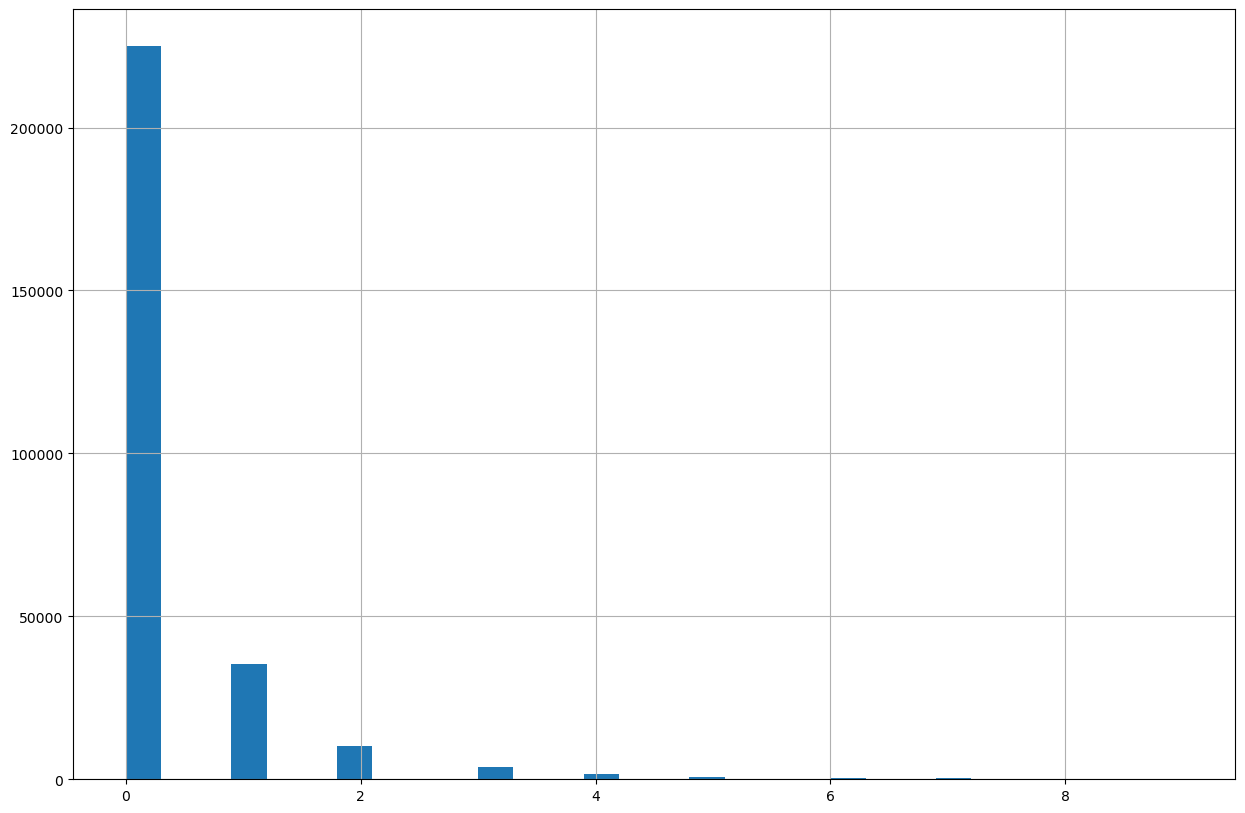

In [177]:
loan_sample[loan_sample['delinq_2yrs']<10]['delinq_2yrs'].hist(bins=30, figsize=(15, 10))
plt.show()

In [178]:
# # Upper limit of delinq_2yrs is set at 10
loan_sample['delinq_2yrs'].where(loan_sample['delinq_2yrs']<10 , 10 , inplace=True)

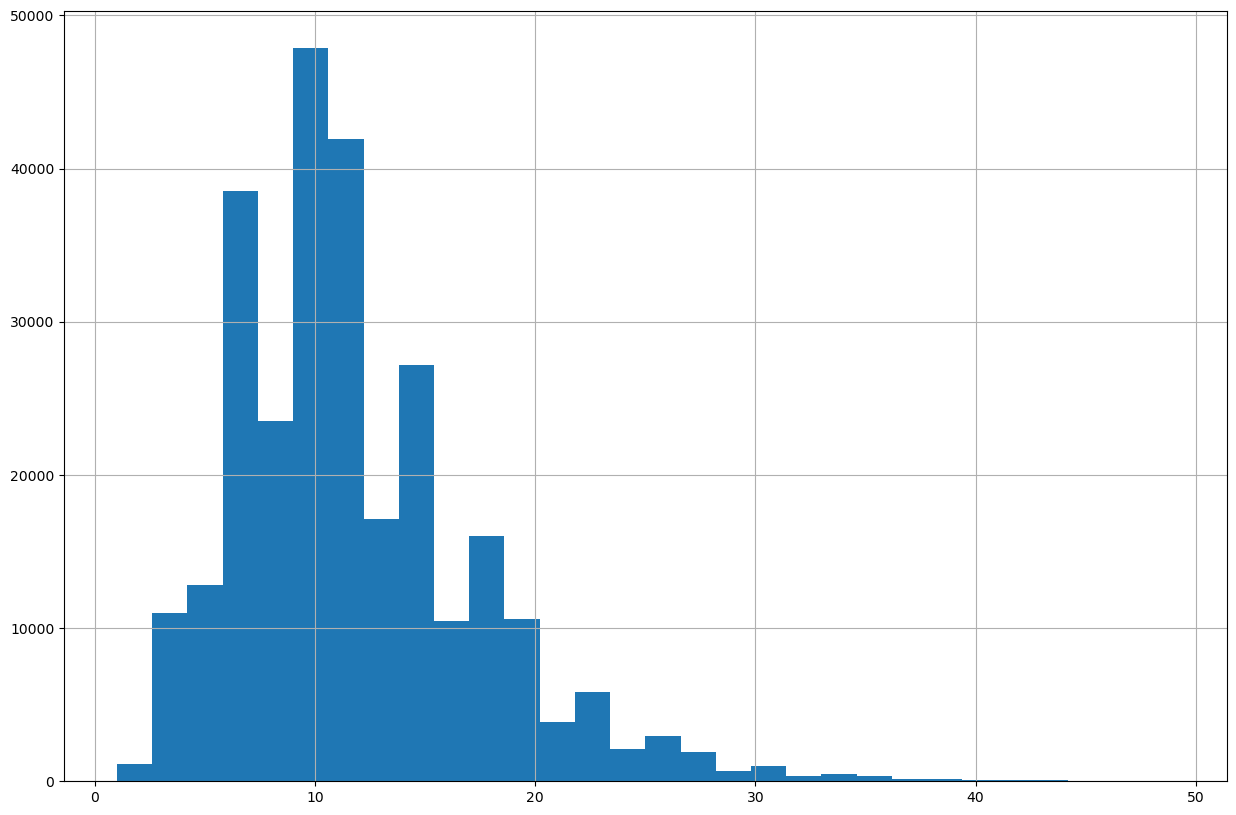

In [179]:
loan_sample[loan_sample['open_acc']<50]['open_acc'].hist(bins=30, figsize=(15, 10))
plt.show()

In [180]:
# Upper limit of open_acc is set at 10
loan_sample['open_acc'].where(loan_sample['open_acc']<50 , 50 , inplace=True)

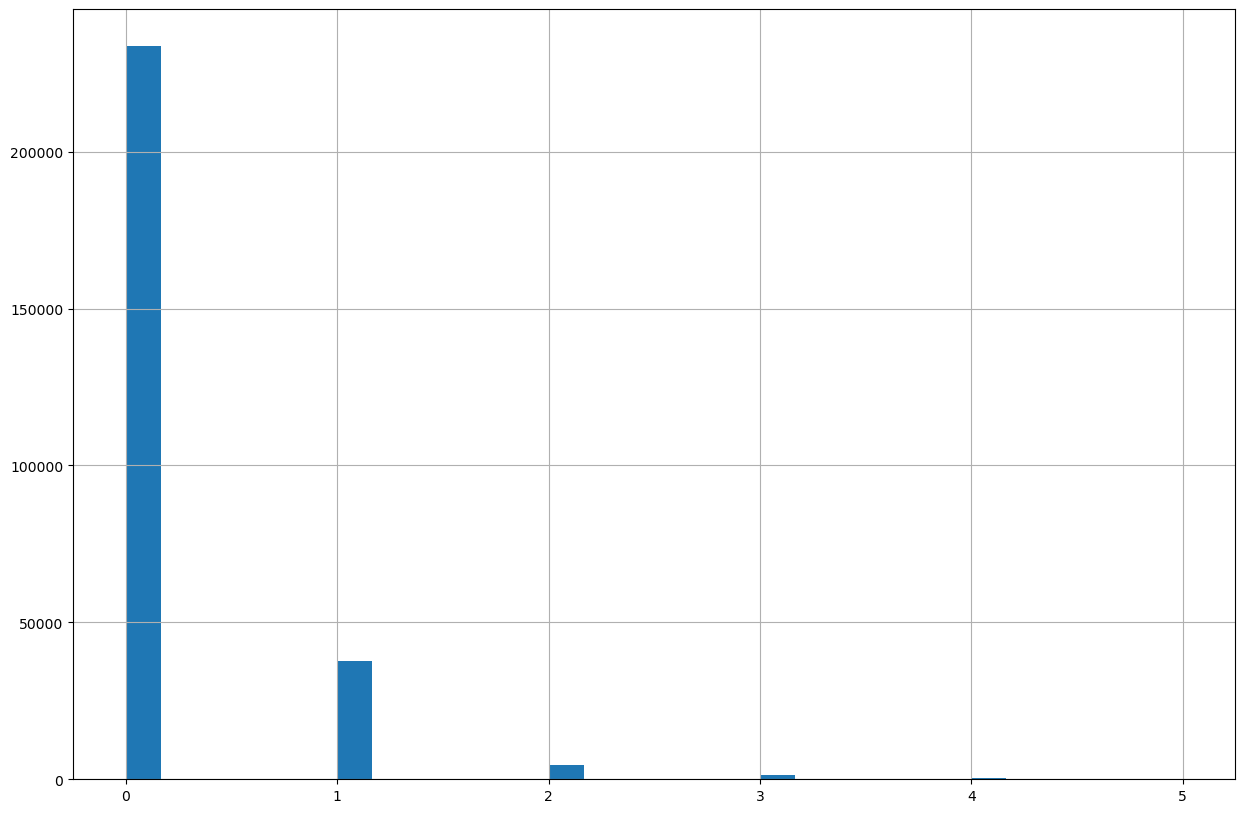

In [181]:
loan_sample[loan_sample['pub_rec']<6]['pub_rec'].hist(bins=30, figsize=(15, 10))
plt.show()

In [182]:
# Upper limit of pub_rec is set at 6
loan_sample['pub_rec'].where(loan_sample['pub_rec']<6 , 6 , inplace=True)

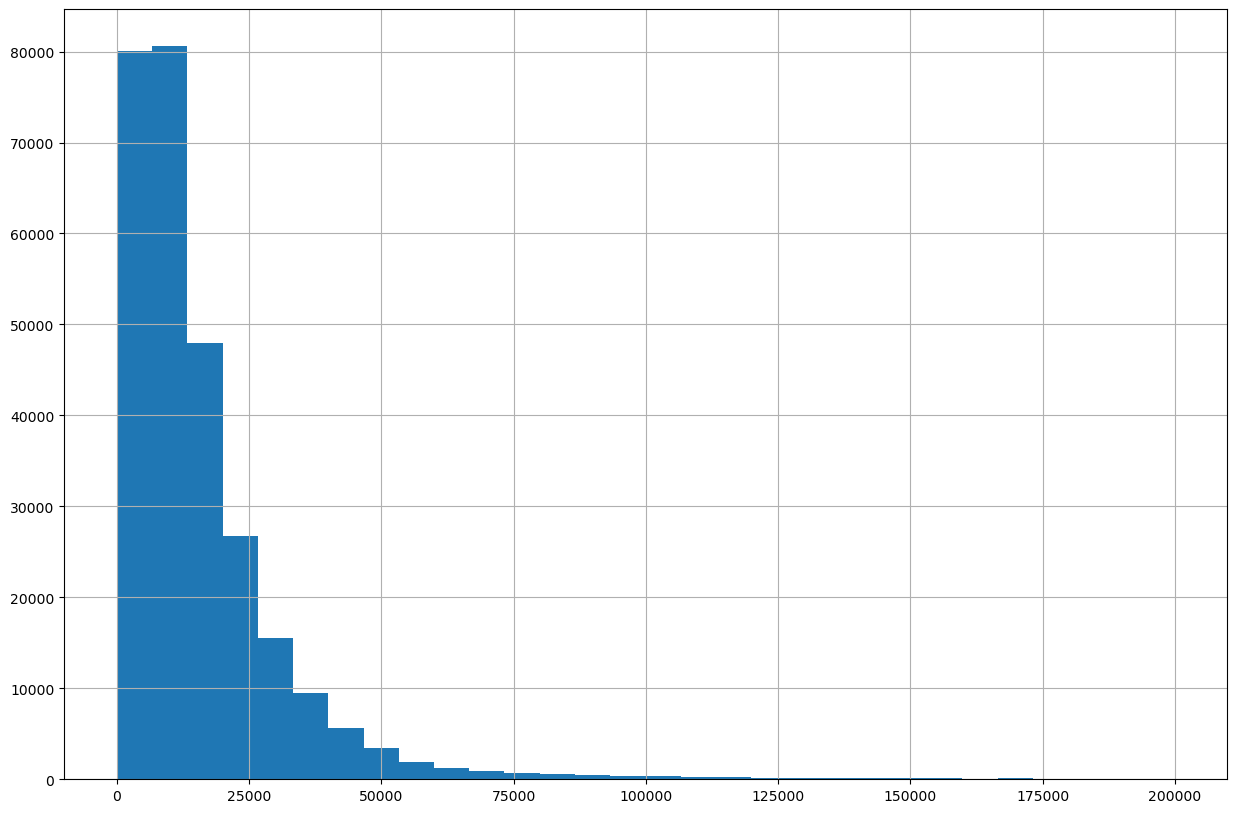

In [183]:
loan_sample[loan_sample['revol_bal']<200000]['revol_bal'].hist(bins=30, figsize=(15, 10))
plt.show()

In [184]:
# Upper limit of revol_bal is set at 200k
loan_sample['revol_bal'].where(loan_sample['revol_bal']<200000 , 200000 , inplace=True)

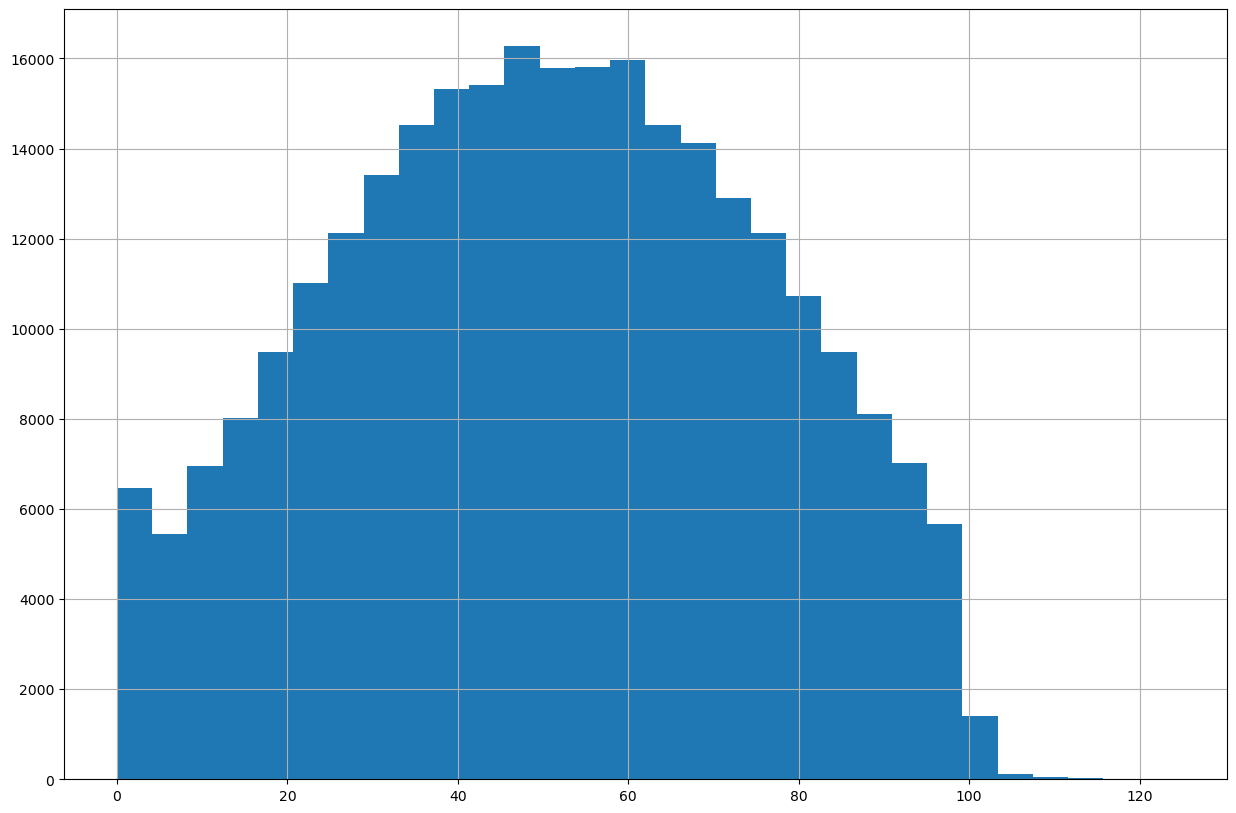

In [185]:
loan_sample[loan_sample['revol_util']<125]['revol_util'].hist(bins=30, figsize=(15, 10))
plt.show()

In [186]:
# Upper limit of revol_util is set at 125
loan_sample['revol_util'].where(loan_sample['revol_util']<125 , 125 , inplace=True)

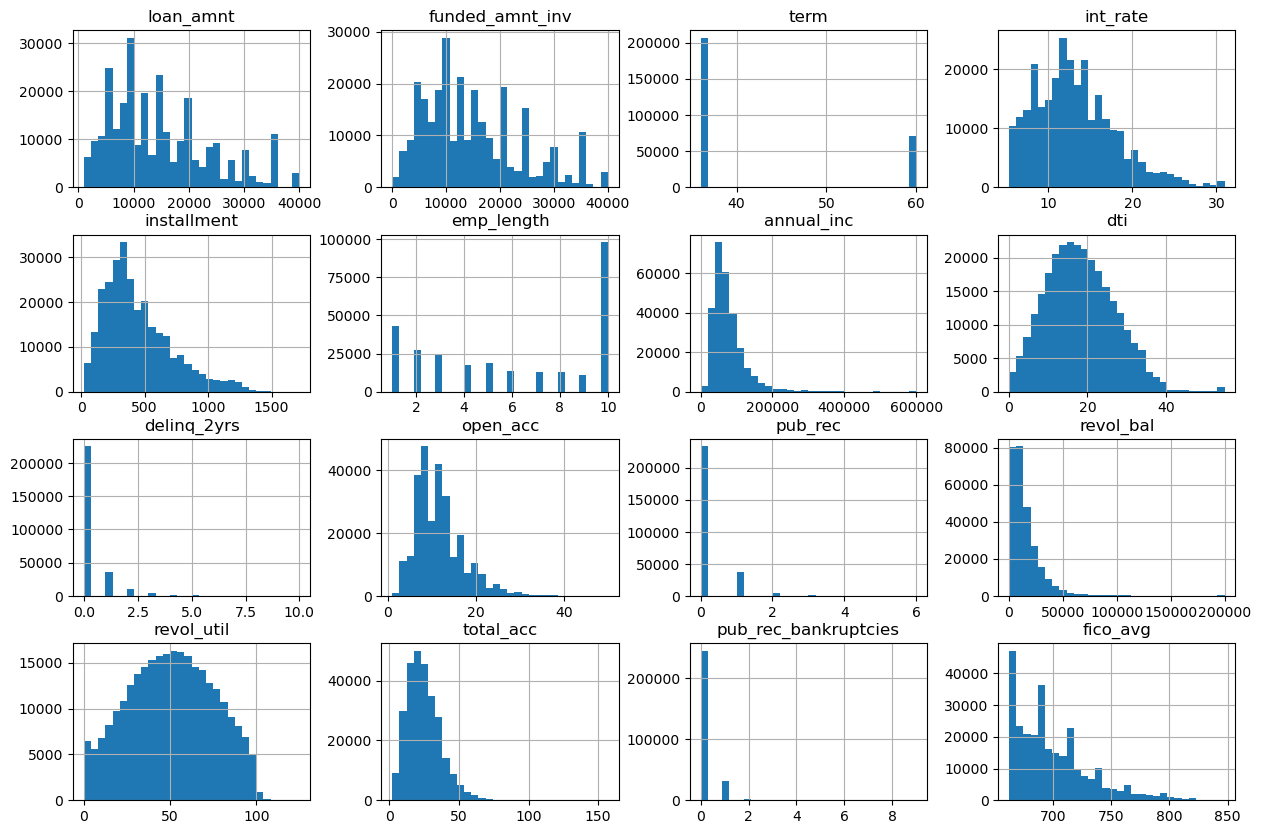

In [187]:
loan_sample.hist(bins=30, figsize=(15, 10))
plt.show()

Now all the numerical columns have reasonable distribution except for emp_length (employee length) which seems to have a large peak at 10 years. This is due to lumping all +10 years emp_length into 10. As the exact information is not available, i.e., it is not clear what +10 years could possibly be (anything between 10-50 years!), the only option here is to treat them all as 10 years. <br>
Next step is to look into categorical columns. 

In [188]:
# list of categorical columns
cat_col_name=loan_sample.select_dtypes(include='object').columns
cat_col_name

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'application_type',
       'loan_status'],
      dtype='object')

In [189]:
loan_sample['emp_title'].value_counts()

Teacher                       5035
Manager                       4581
Owner                         2604
Registered Nurse              2084
RN                            1885
                              ... 
jp flooring                      1
Advance Quality Engineer         1
Grainger Industrial Supply       1
Prescott Cardiology              1
BC 2                             1
Name: emp_title, Length: 105134, dtype: int64

All the categorical columns have reasonable number of categories except for `emp_title` which takes over than 100000 different values. I will drop this column.

In [190]:
loan_sample.drop(columns=['emp_title'], inplace=True)

In [191]:
# list of categorical columns
cat_col_name=loan_sample.select_dtypes(include='object').columns
cat_col_name

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'addr_state', 'application_type', 'loan_status'],
      dtype='object')

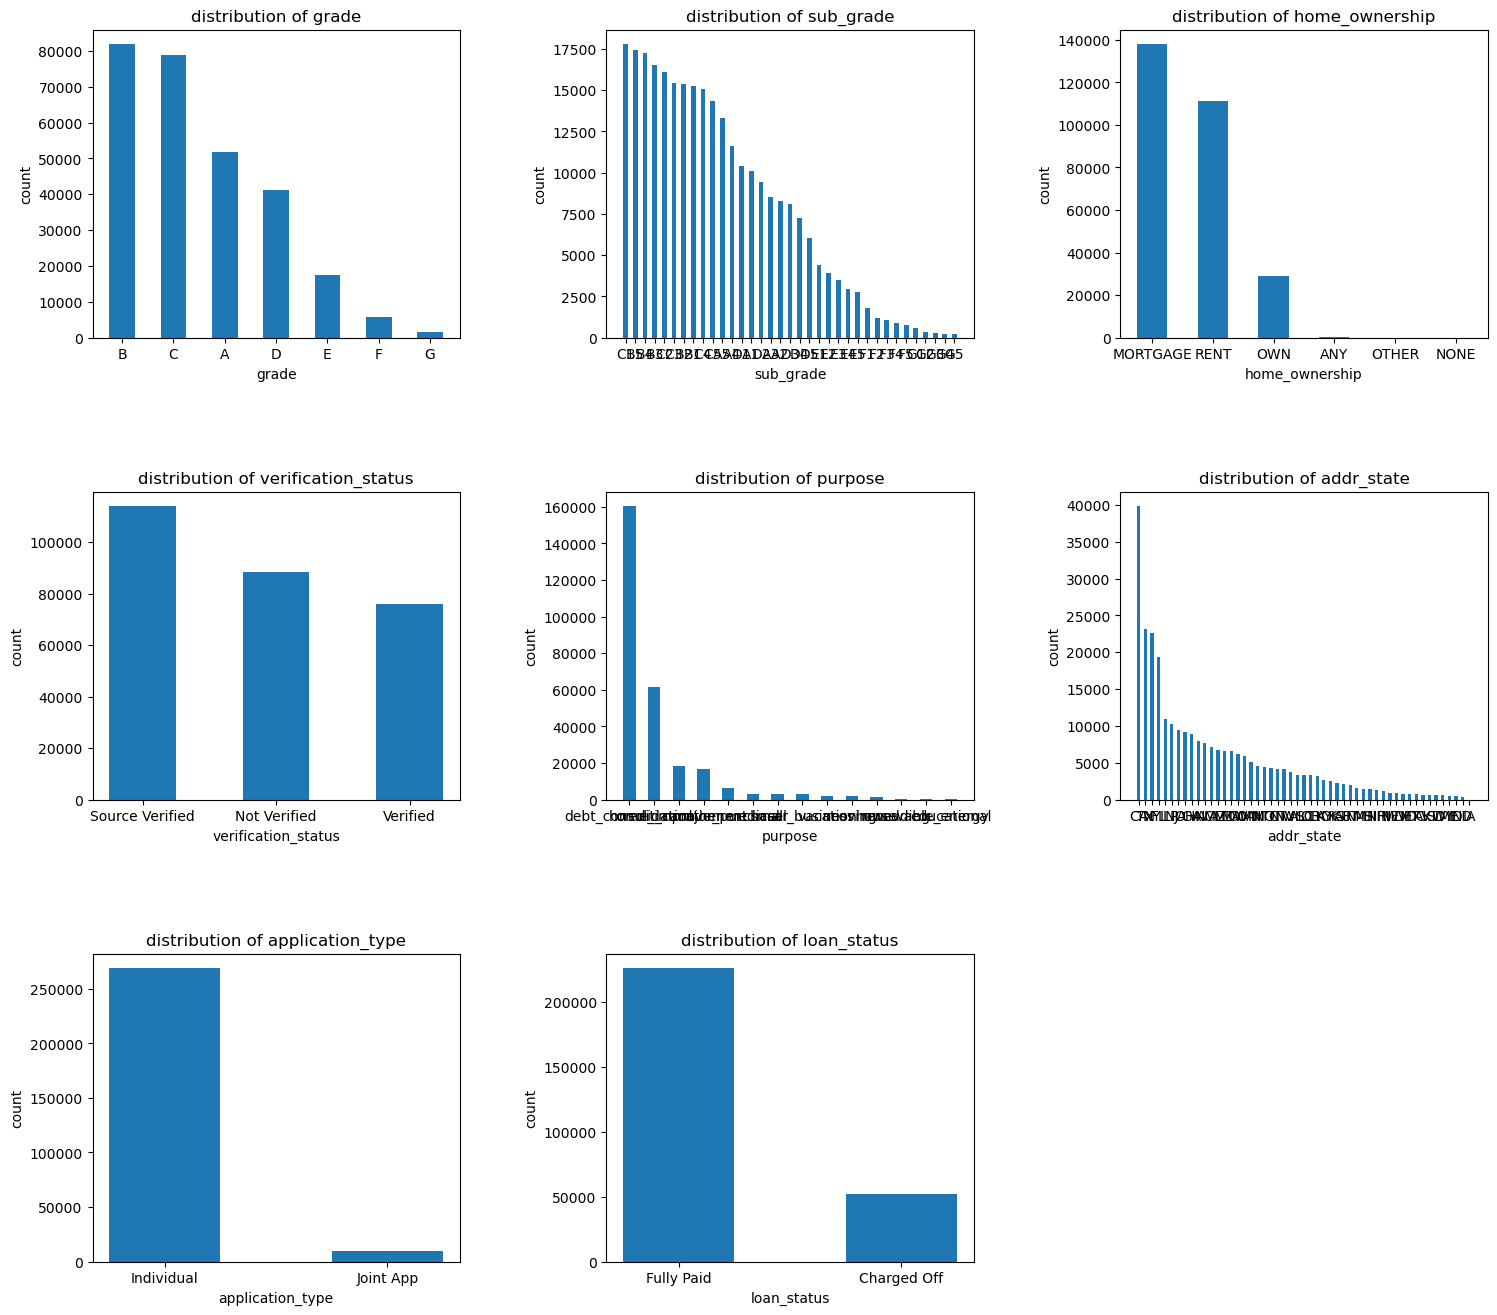

In [192]:

fig, axes=plt.subplots(3,3,figsize=(18,16) )
i=1
for name in (cat_col_name):
    categories = loan_sample[name].value_counts().index
    counts = loan_sample[name].value_counts().values
    plt.subplot(3,3,i)
    plt.bar(categories, counts, width=0.5)
    plt.xlabel(name)
    plt.ylabel("count")
    plt.title(f'distribution of {name}')
    i+=1
    plt.subplots_adjust( wspace=0.4, hspace=0.5)
fig.delaxes(axes[2][2])
plt.show()


Let's have a closer look at `purpose`, `sub_grade`, `addr_state` (The x labels are not clear in the above figure)  

Text(0.5, 1.0, 'distribution of sub_grade')

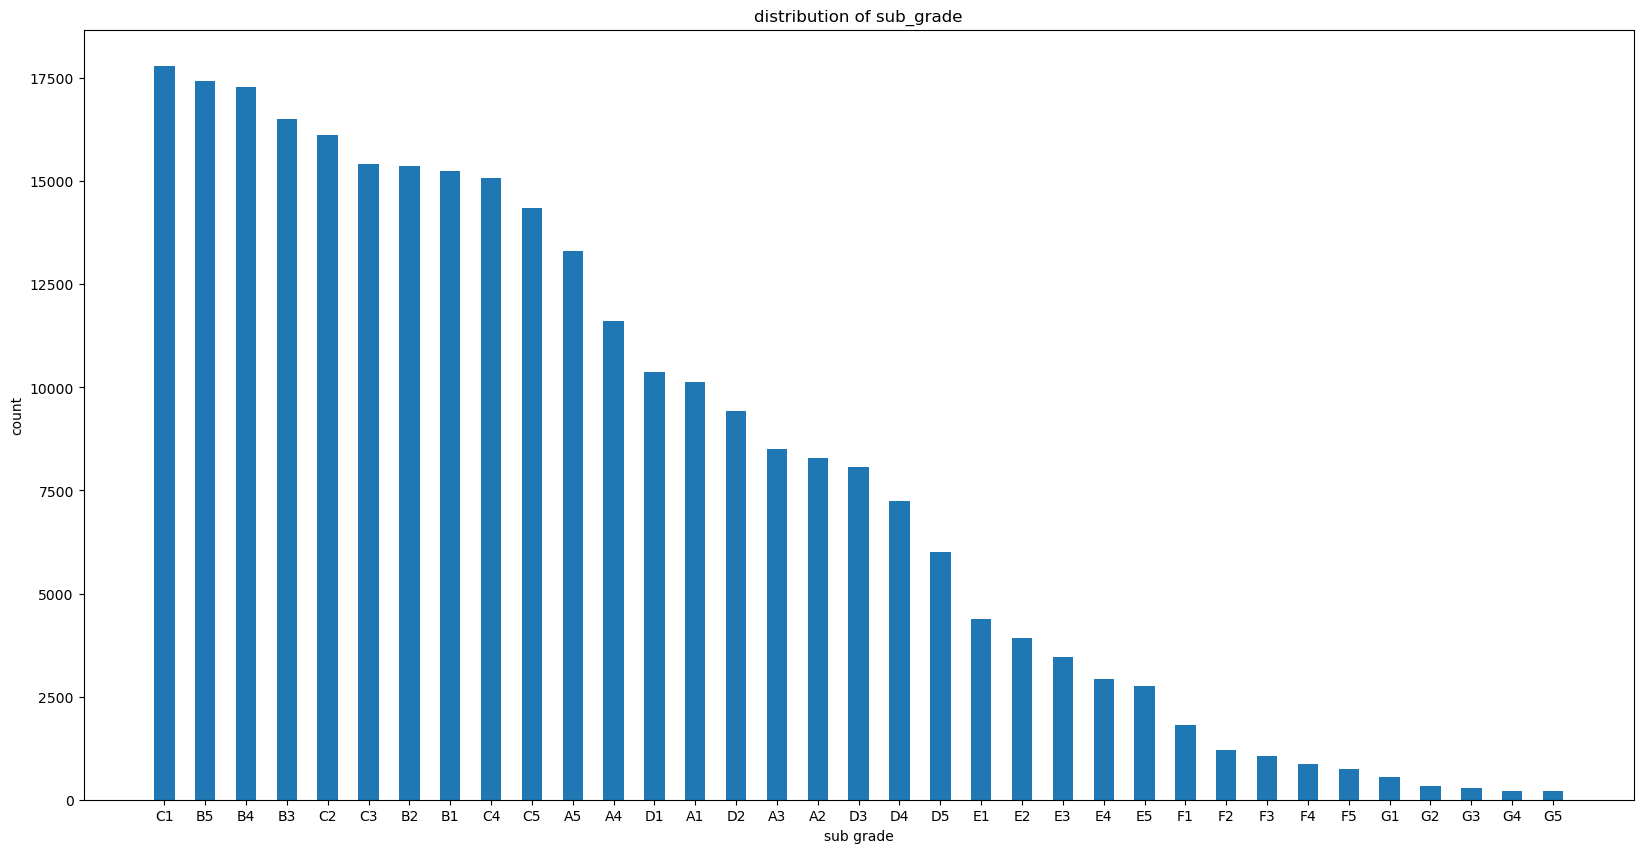

In [193]:
categories = loan_sample['sub_grade'].value_counts().index
counts = loan_sample['sub_grade'].value_counts().values
plt.figure(figsize=(20,10))
plt.bar(categories, counts, width=0.5)
plt.xlabel('sub grade')
plt.ylabel('count')
plt.title("distribution of sub_grade")

Text(0.5, 1.0, 'distribution of purpose')

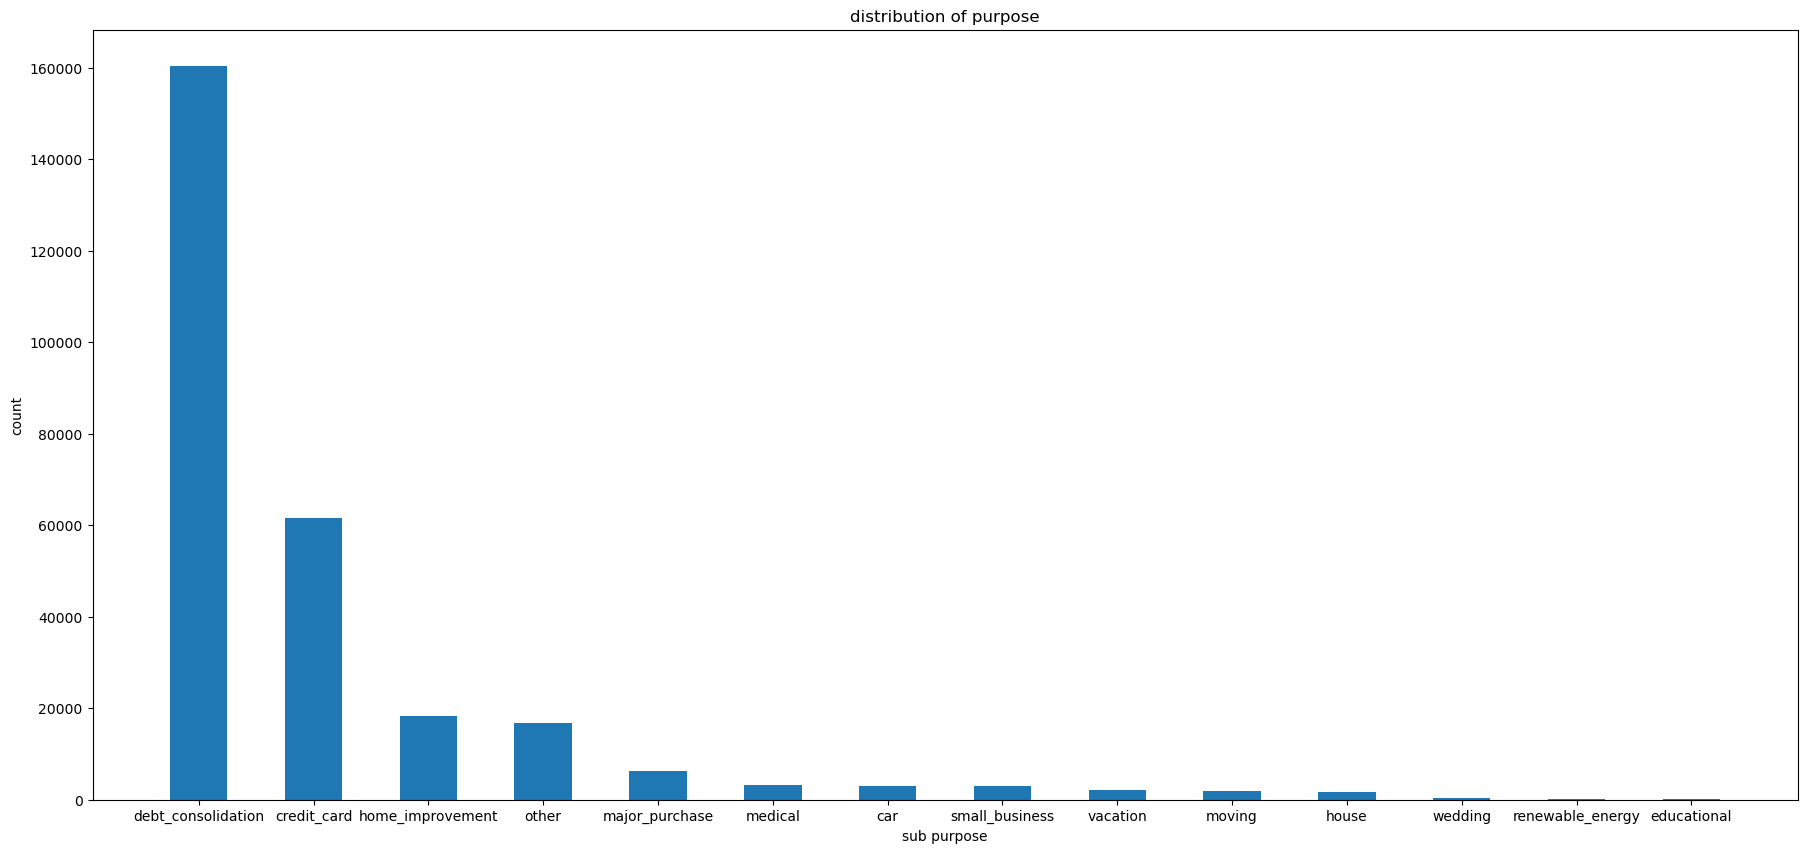

In [194]:
categories = loan_sample['purpose'].value_counts().index
counts = loan_sample['purpose'].value_counts().values
plt.figure(figsize=(22,10))
plt.bar(categories, counts, width=0.5)
plt.xlabel('sub purpose')
plt.ylabel('count')
plt.title("distribution of purpose")

Text(0.5, 1.0, 'distribution of state')

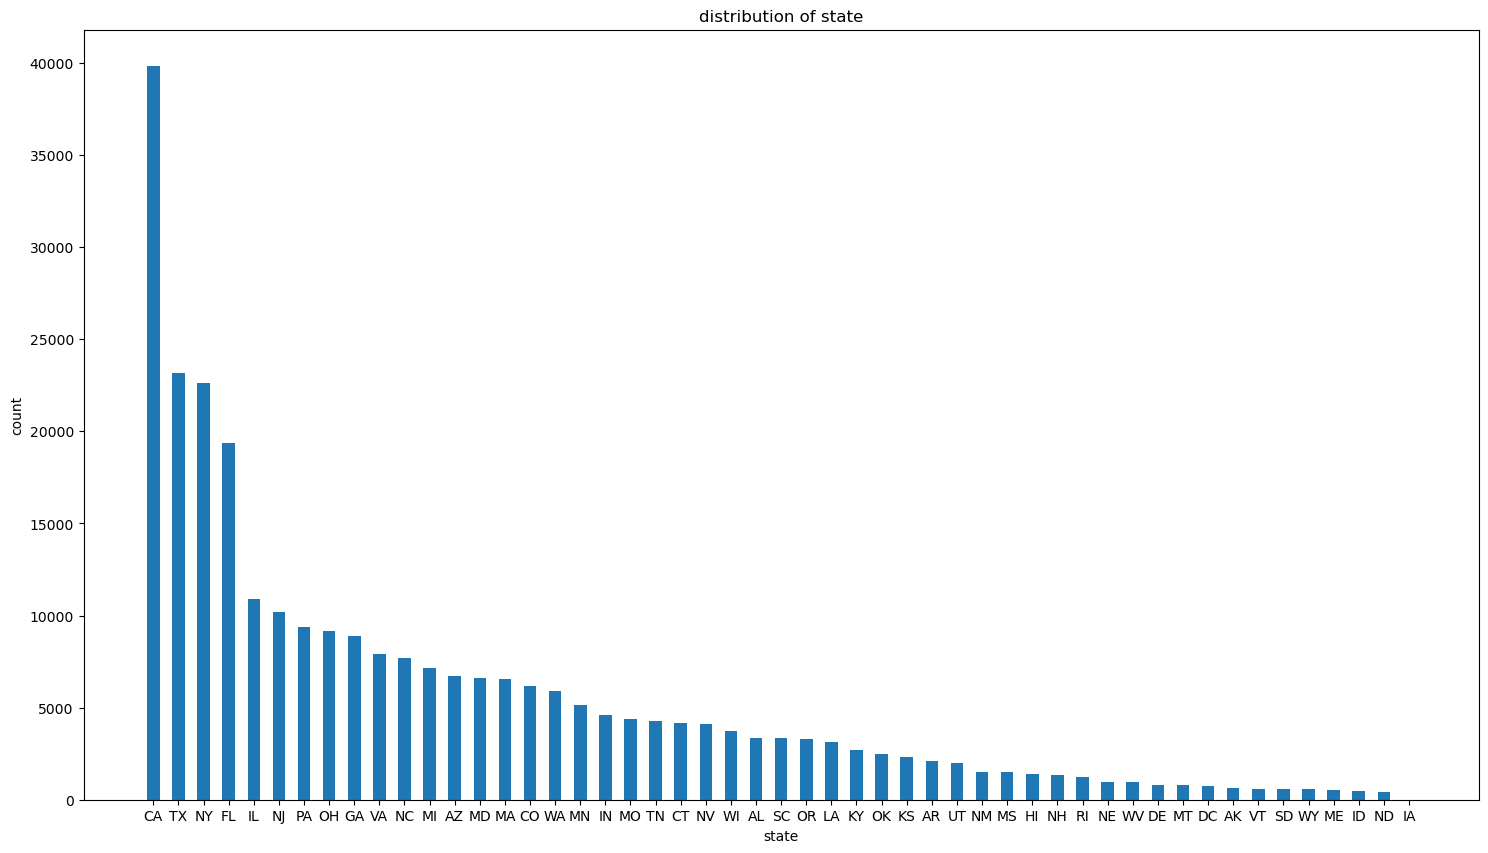

In [195]:
categories = loan_sample['addr_state'].value_counts().index
counts = loan_sample['addr_state'].value_counts().values
plt.figure(figsize=(18,10))
plt.bar(categories, counts, width=0.5)
plt.xlabel('state')
plt.ylabel('count')
plt.title("distribution of state")

In [196]:
# % of each category in home_ownership column 
loan_sample['home_ownership'].value_counts()/loan_sample['home_ownership'].count()

MORTGAGE    0.495525
RENT        0.399785
OWN         0.104094
ANY         0.000485
OTHER       0.000086
NONE        0.000025
Name: home_ownership, dtype: float64

In `home_ownership` column, `ANY`, `OTHER`, `NONE` are a very small fraction of the column. Im going to map `Any` --> MORTGAGE, `OTHER` --> RENT, `NONE`--> `OWN`

In [197]:
loan_sample.replace({'home_ownership': {'ANY':'MORTGAGE', 'OTHER':'RENT', 'NONE':'OWN'}}, inplace=True)
loan_sample['home_ownership'].value_counts()

MORTGAGE    138043
RENT        111287
OWN          28977
Name: home_ownership, dtype: int64

`application_type` and `loan_status` are binary columns which can be mapped to 0 and 1

In [198]:
loan_sample['application_type'] = loan_sample['application_type'].map({'Individual': 1, 'Joint App': 0})
loan_sample['application_type'].value_counts()

1    268905
0      9402
Name: application_type, dtype: int64

In [201]:
loan_sample['loan_status'] = loan_sample['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})
loan_sample['loan_status'].value_counts()

0    225914
1     52393
Name: loan_status, dtype: int64